In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# import xgboost as xgb
from sklearn import metrics
import itertools
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
data = pd.read_csv('/Users/naweedahmed/Desktop/Flatiron_Feb/capstone_project/dsc-capstone-submission-checklist/CSV Files/data_feat.csv')

In [6]:
data.head()

,Unnamed: 0,contact,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,...,job_technician,job_unemployed,job_unknown,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65-74,age_group_75-79,age_group_80+
0,0,1,5,1,261,1,999,0,1.1,93.994,...,0,0,0,0,0,0,1,0,0,0
1,1,1,5,1,149,1,999,0,1.1,93.994,...,0,0,0,0,0,0,1,0,0,0
2,2,1,5,1,226,1,999,0,1.1,93.994,...,0,0,0,0,1,0,0,0,0,0
3,3,1,5,1,151,1,999,0,1.1,93.994,...,0,0,0,0,1,0,0,0,0,0
4,4,1,5,1,307,1,999,0,1.1,93.994,...,0,0,0,0,0,0,1,0,0,0


In [7]:
data.drop(columns='Unnamed: 0', inplace=True)

In [8]:
data.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,...,job_technician,job_unemployed,job_unknown,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65-74,age_group_75-79,age_group_80+
0,1,5,1,261,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,0
1,1,5,1,149,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,0
2,1,5,1,226,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,0,0
3,1,5,1,151,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,1,0,0,0,0,0
4,1,5,1,307,1,999,0,1.1,93.994,-36.4,...,0,0,0,0,0,0,1,0,0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 59 columns):
contact                            41188 non-null int64
month                              41188 non-null int64
day_of_week                        41188 non-null int64
duration                           41188 non-null int64
campaign                           41188 non-null int64
pdays                              41188 non-null int64
previous                           41188 non-null int64
emp_var_rate                       41188 non-null float64
cons_price_idx                     41188 non-null float64
cons_conf_idx                      41188 non-null float64
euribor3m                          41188 non-null float64
nr_employed                        41188 non-null float64
y                                  41188 non-null int64
MOM_inflation                      41188 non-null float64
Wage_Growth                        41188 non-null float64
EURUSD                             41

In [10]:
import matplotlib.pyplot as plt

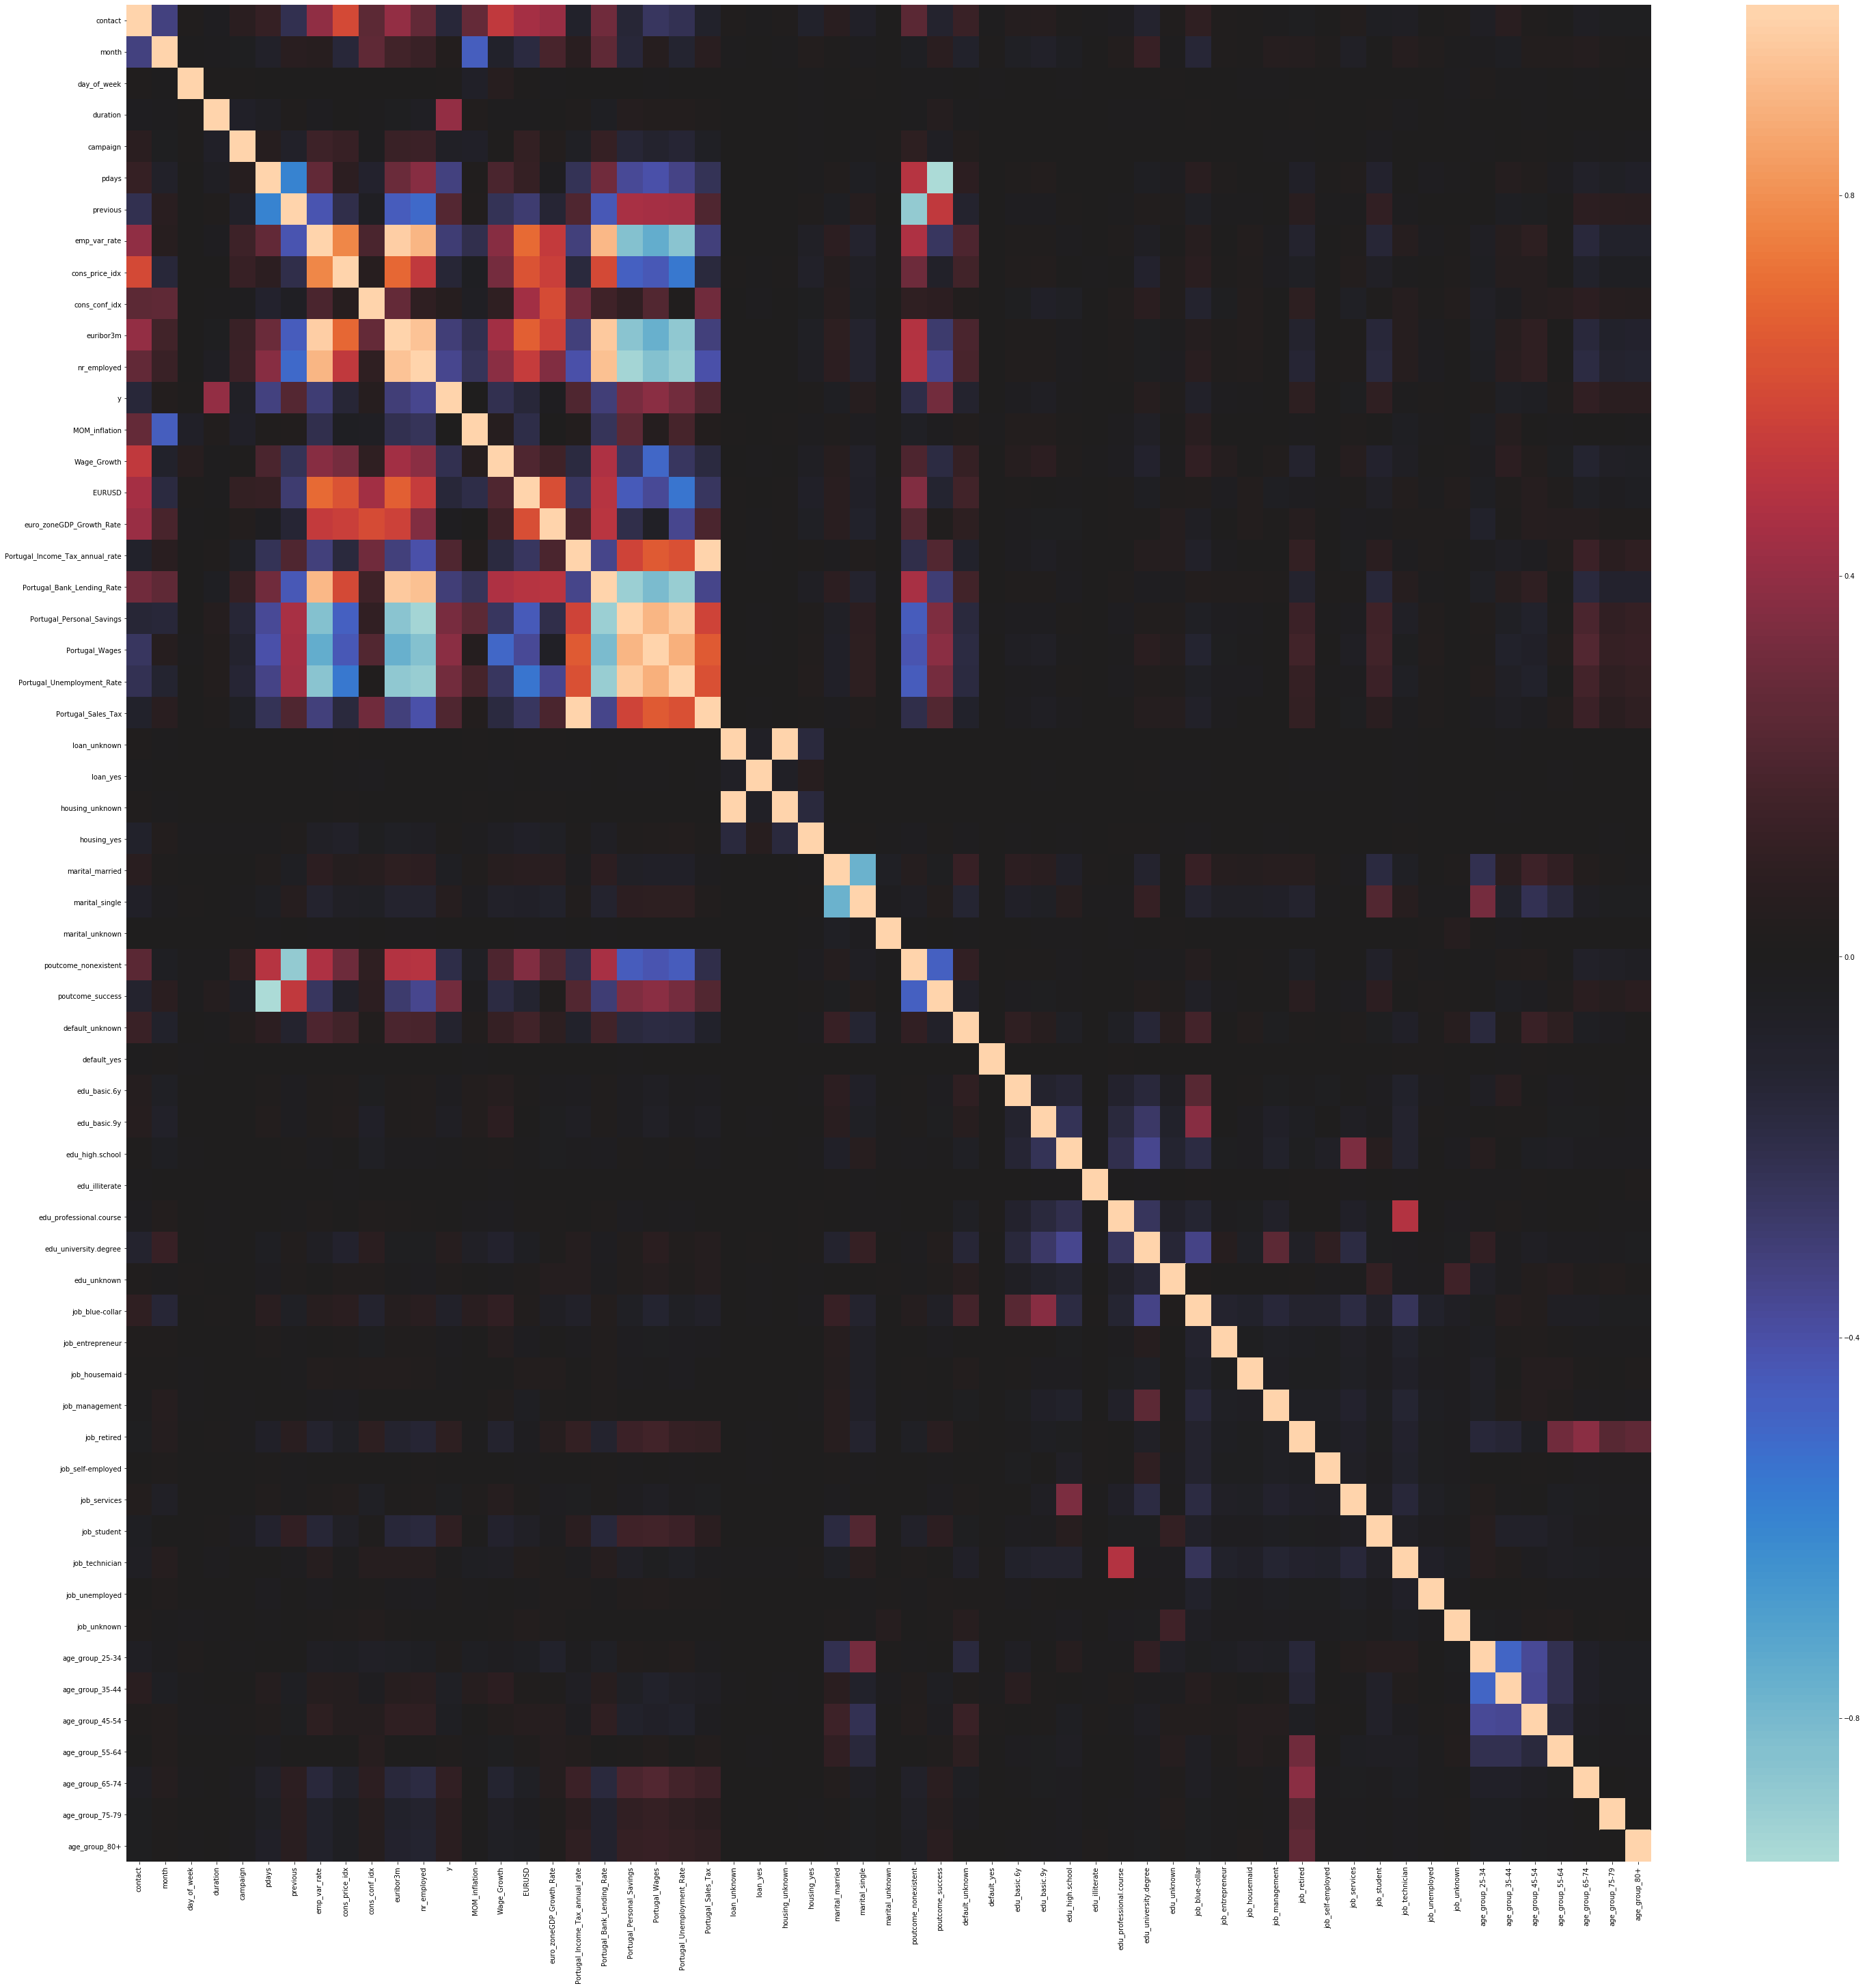

In [11]:
import seaborn as sns
plt.figure(figsize=(50,50))
sns.heatmap(data.corr(), center=0)
plt.show();

In [16]:
data.columns

Index(['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'MOM_inflation', 'Wage_Growth',
       'EURUSD', 'euro_zoneGDP_Growth_Rate', 'Portugal_Income_Tax_annual_rate',
       'Portugal_Bank_Lending_Rate', 'Portugal_Personal_Savings',
       'Portugal_Wages', 'Portugal_Unemployment_Rate', 'Portugal_Sales_Tax',
       'loan_unknown', 'loan_yes', 'housing_unknown', 'housing_yes',
       'marital_married', 'marital_single', 'marital_unknown',
       'poutcome_nonexistent', 'poutcome_success', 'default_unknown',
       'default_yes', 'edu_basic.6y', 'edu_basic.9y', 'edu_high.school',
       'edu_illiterate', 'edu_professional.course', 'edu_university.degree',
       'edu_unknown', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemploy

In [12]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [13]:
X = data.drop(columns='y', axis=1)
y = data['y']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 42)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.20, random_state = 42)

In [16]:
#Checking to see the size of each set.
print('Shapes of Each Set')
print('-------------------')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}')
print(f'y_val: {y_val.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

Shapes of Each Set
-------------------
X_train: (26360, 58)
y_train: (26360,)
X_val: (6590, 58)
y_val: (6590,)
X_test: (8238, 58)
y_test: (8238,)


In [17]:
logreg = LogisticRegression(penalty='none', solver='lbfgs')
log_reg = logreg.fit(X_train, y_train)
log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
log_reg_yval_predproba = log_reg.predict_proba(X_val)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_val, log_reg_yval_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.925368315382318


In [19]:
log_reg_ytrain_predproba = log_reg.predict_proba(X_train)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_train, log_reg_ytrain_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.9242890089595126


In [20]:
log_reg_ytest_predproba = log_reg.predict_proba(X_test)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_test, log_reg_ytest_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.9265271542498469


In [18]:
rfe = RFE(estimator=log_reg, step=1)
rfe = rfe.fit(X_train, y_train)

In [19]:

selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,contact,1
44,job_retired,1
52,age_group_35-44,1
27,marital_single,1
56,age_group_75-79,1
30,poutcome_success,1
31,default_unknown,1
51,age_group_25-34,1
21,Portugal_Sales_Tax,1
34,edu_basic.9y,1


In [20]:
X_train_rfe = rfe.transform(X_train)
X_val_rfe = rfe.transform(X_val)

In [21]:
log_reg_rfe_model = log_reg.fit(X_train_rfe, y_train)

In [22]:
rfecv = RFECV(estimator=log_reg, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 57
Best features : Index(['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'MOM_inflation', 'Wage_Growth', 'EURUSD',
       'euro_zoneGDP_Growth_Rate', 'Portugal_Income_Tax_annual_rate',
       'Portugal_Bank_Lending_Rate', 'Portugal_Personal_Savings',
       'Portugal_Wages', 'Portugal_Unemployment_Rate', 'Portugal_Sales_Tax',
       'loan_unknown', 'loan_yes', 'housing_unknown', 'housing_yes',
       'marital_married', 'marital_single', 'poutcome_nonexistent',
       'poutcome_success', 'default_unknown', 'default_yes', 'edu_basic.6y',
       'edu_basic.9y', 'edu_high.school', 'edu_illiterate',
       'edu_professional.course', 'edu_university.degree', 'edu_unknown',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_te

In [25]:
rfecv.grid_scores_

array([0.89753414, 0.89753414, 0.89685129, 0.89734446, 0.89749621,
       0.89692716, 0.89666161, 0.89632018, 0.89658574, 0.89662367,
       0.8965478 , 0.89632018, 0.89669954, 0.8965478 , 0.89719272,
       0.89745827, 0.89726859, 0.89742033, 0.89757208, 0.89715478,
       0.89723065, 0.89704097, 0.89719272, 0.89742033, 0.89730653,
       0.8973824 , 0.89749621, 0.89745827, 0.89692716, 0.89749621,
       0.89723065, 0.89685129, 0.89658574, 0.89639605, 0.89552352,
       0.89355083, 0.89465099, 0.89415781, 0.89510622, 0.89313354,
       0.89446131, 0.89362671, 0.89499241, 0.89757208, 0.89764795,
       0.90079666, 0.90349014, 0.90751138, 0.90792868, 0.90864947,
       0.90827011, 0.90838392, 0.9085736 , 0.90861153, 0.90853566,
       0.90864947, 0.90914264, 0.90914264])

Hyperparameter Tuning:

In [22]:
param_grid01 = {'C': [0.01,0.1,1,10,100],
             'penalty': ['l1','l2'],
             'solver': ['liblinear','saga']}

In [ ]:
log_reg_gs01 = GridSearchCV(log_reg,
                         param_grid01,
                         cv=5,
                         scoring='roc_auc',
                         return_train_score=True)

log_reg_gs01.fit(X_train,y_train)

In [31]:
dec_tree = DecisionTreeClassifier(criterion='entropy')

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
dec_tree_yval_pred = dec_tree.predict(X_val)

print('Accuracy: ', accuracy_score(y_val, dec_tree_yval_pred))

Accuracy:  0.8887708649468892


In [33]:
dec_tree_yval_predproba = dec_tree.predict_proba(X_val)
print("ROC_AUC of Baseline model (val) =", roc_auc_score(y_val, dec_tree_yval_predproba[:,1]))

ROC_AUC of Baseline model (val) = 0.7314047053661306


In [34]:
bag_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [35]:
bag_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [36]:
bag_tree.score(X_train, y_train)

0.9191198786039454

In [37]:
bag_tree.score(X_val, y_val)

0.9176024279210926

In [38]:
ran_for = RandomForestClassifier(n_estimators=100, max_depth= 5)
ran_for.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
ran_for.score(X_train, y_train)

0.9088391502276176

In [40]:
ran_for.score(X_test, y_test)

0.9016751638747269

In [41]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_val)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_val, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

NameError: name 'xgb' is not defined

In [118]:
test_preds = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test accuracy: {:.4}%".format(test_accuracy * 100))

Test accuracy: 91.72%


In [113]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [114]:
y_pred = gnb.predict(X_val)

In [115]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.8629742033383915
